In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('dataset/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
dataset.shape

(20640, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see there are missing values in total bedrooms column <br>
All columns are neumeric in nature except ocean proximity

In [5]:
dataset['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
dataset.drop(columns=['latitude', 'longitude']).describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


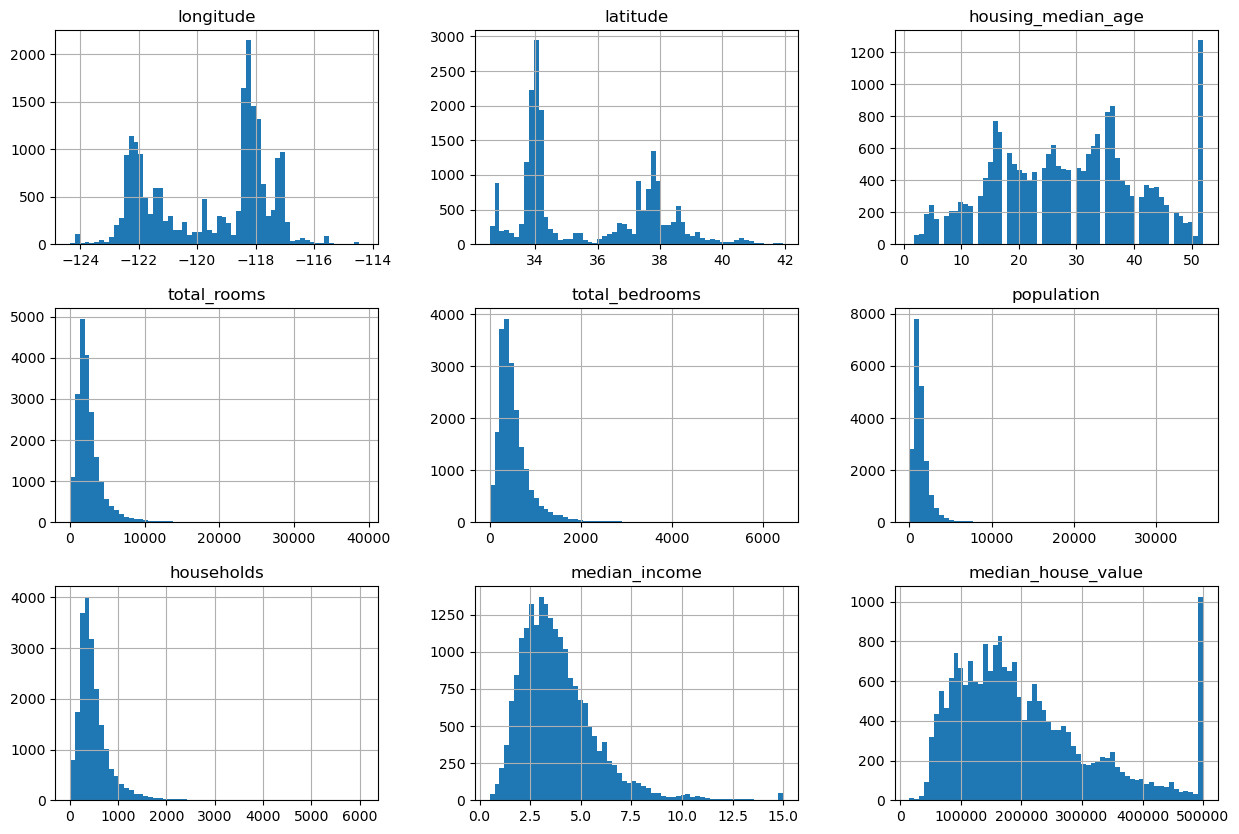

In [7]:
dataset.hist(bins=60, figsize=(15,10))
plt.show()

In [8]:
# splitting dataset to train and test
train_set, test_set = train_test_split(dataset, test_size=0.2)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

## Visualizing data

In [9]:
df = train_set.copy()

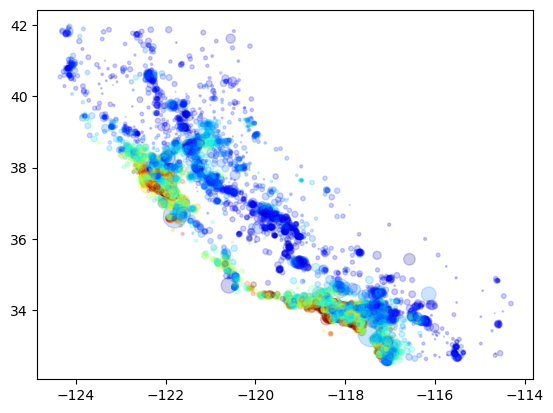

In [10]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.2,s=df['population']/100, cmap='jet', c=df['median_house_value'])
plt.show()

In [11]:
df.drop(columns=['ocean_proximity']).corr()['median_house_value'].sort_values()

latitude             -0.150370
longitude            -0.041581
population           -0.024813
total_bedrooms        0.049339
households            0.064714
housing_median_age    0.111069
total_rooms           0.134309
median_income         0.690980
median_house_value    1.000000
Name: median_house_value, dtype: float64

C:\Users\rojit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rojit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rojit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rojit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\r

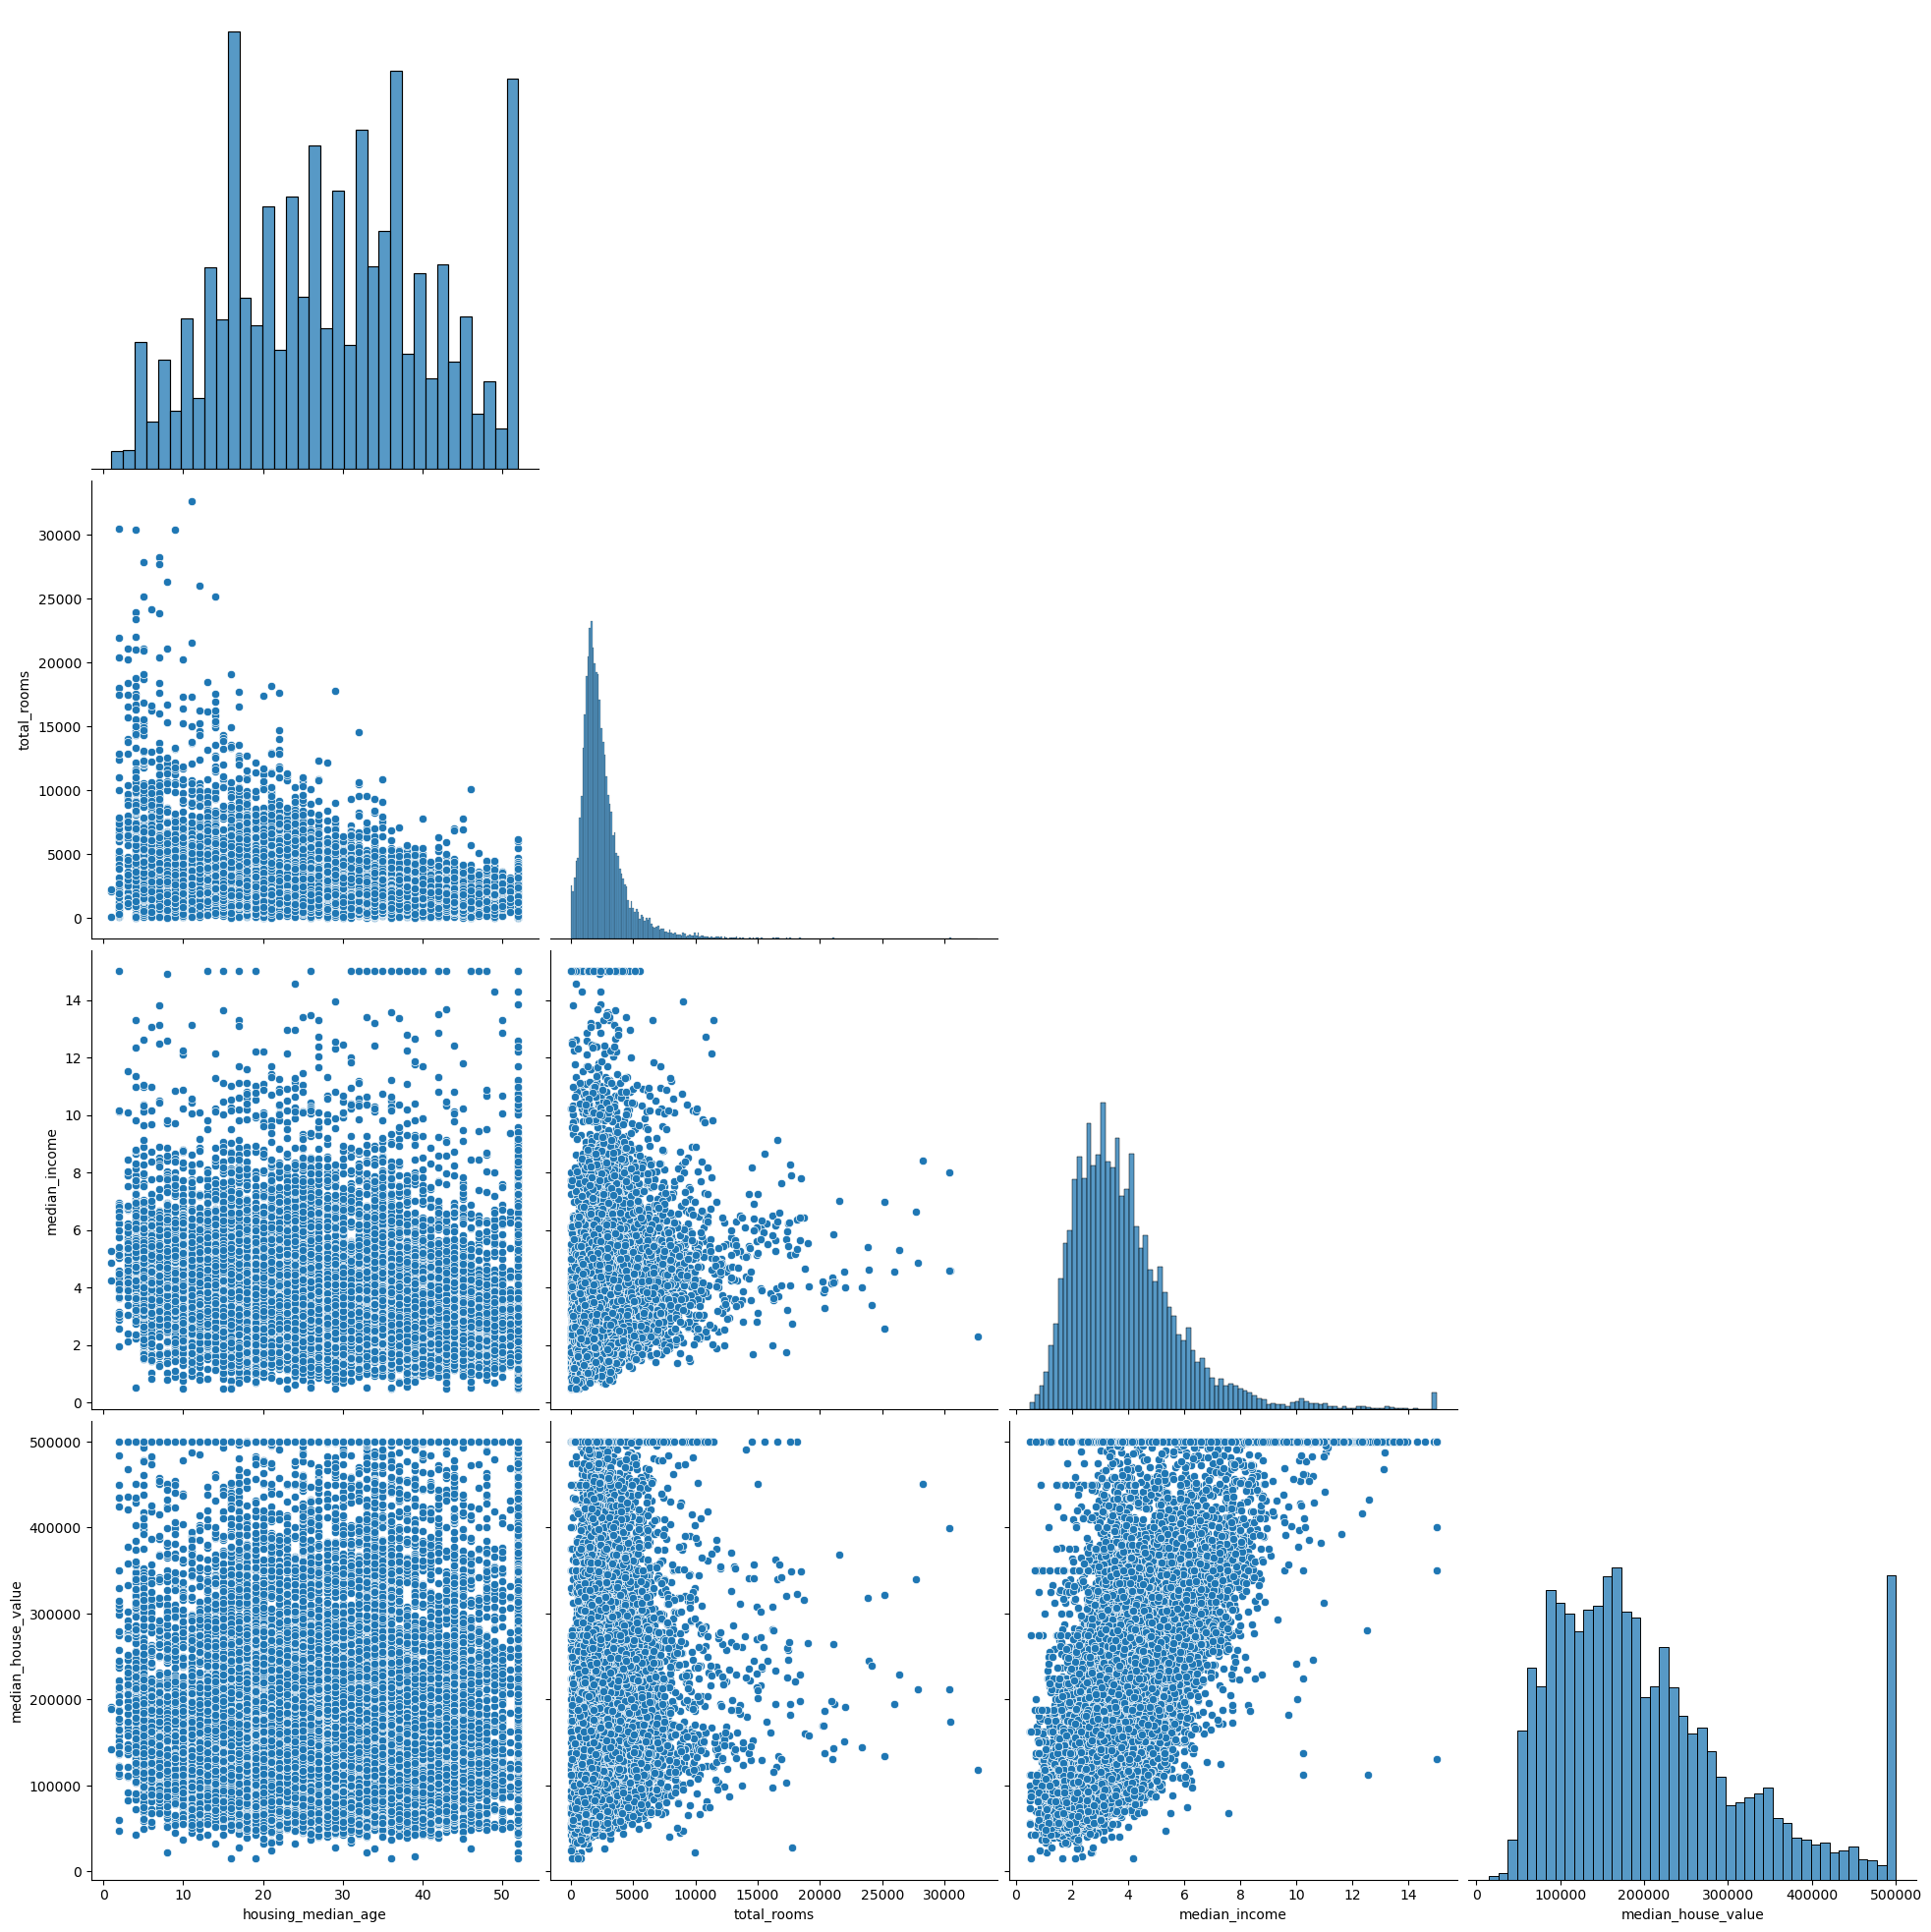

In [12]:
sns.pairplot(df[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']], corner=True, size=5)

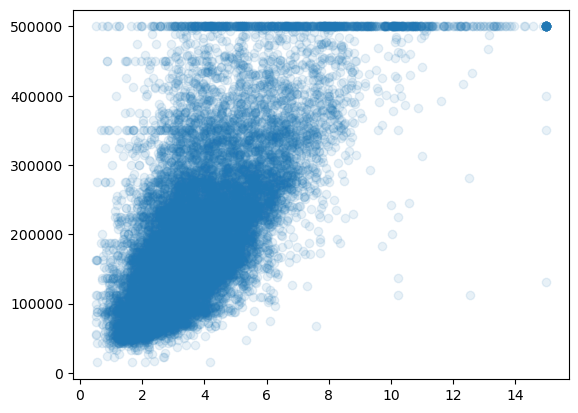

In [13]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1)
plt.show()

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16431,-121.32,38.15,5.0,5428.0,994.0,2725.0,902.0,3.9323,130100.0,INLAND
7424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826,145500.0,<1H OCEAN
6604,-118.17,34.18,38.0,1280.0,231.0,828.0,237.0,4.3750,166700.0,<1H OCEAN
381,-122.16,37.74,46.0,1029.0,181.0,567.0,211.0,3.4844,129500.0,NEAR BAY
11905,-117.40,33.96,51.0,1806.0,322.0,709.0,298.0,3.5750,125500.0,INLAND


In [15]:
# converting total rooms, total bedrooms and population
df['rooms_per_house'] = df['total_rooms']/df['households']
df['bedrooms_ratio'] =  df['total_bedrooms']/ df['total_rooms']
df['people_per_household'] = df['population']/ df['households']

In [16]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_household
16431,-121.32,38.15,5.0,5428.0,994.0,2725.0,902.0,3.9323,130100.0,INLAND,6.017738,0.183125,3.021064
7424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826,145500.0,<1H OCEAN,2.386555,0.366197,3.546218
6604,-118.17,34.18,38.0,1280.0,231.0,828.0,237.0,4.3750,166700.0,<1H OCEAN,5.400844,0.180469,3.493671
381,-122.16,37.74,46.0,1029.0,181.0,567.0,211.0,3.4844,129500.0,NEAR BAY,4.876777,0.175899,2.687204
11905,-117.40,33.96,51.0,1806.0,322.0,709.0,298.0,3.5750,125500.0,INLAND,6.060403,0.178295,2.379195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,-122.32,38.01,26.0,3054.0,492.0,1495.0,496.0,4.6944,171100.0,NEAR BAY,6.157258,0.161100,3.014113
1521,-122.07,37.91,28.0,1731.0,295.0,810.0,295.0,5.0391,259800.0,NEAR BAY,5.867797,0.170422,2.745763
1092,-121.87,39.82,11.0,5103.0,825.0,2456.0,810.0,4.5032,159700.0,INLAND,6.300000,0.161670,3.032099
1985,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319,138500.0,INLAND,5.456121,0.205322,2.430119


In [17]:
df.drop(columns=['ocean_proximity']).corr()['median_house_value'].sort_values()

bedrooms_ratio         -0.259781
latitude               -0.150370
longitude              -0.041581
population             -0.024813
people_per_household   -0.021997
total_bedrooms          0.049339
households              0.064714
housing_median_age      0.111069
total_rooms             0.134309
rooms_per_house         0.154101
median_income           0.690980
median_house_value      1.000000
Name: median_house_value, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16431 to 5665
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             16512 non-null  float64
 1   latitude              16512 non-null  float64
 2   housing_median_age    16512 non-null  float64
 3   total_rooms           16512 non-null  float64
 4   total_bedrooms        16347 non-null  float64
 5   population            16512 non-null  float64
 6   households            16512 non-null  float64
 7   median_income         16512 non-null  float64
 8   median_house_value    16512 non-null  float64
 9   ocean_proximity       16512 non-null  object 
 10  rooms_per_house       16512 non-null  float64
 11  bedrooms_ratio        16347 non-null  float64
 12  people_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [23]:
housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16431 to 5665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16347 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [38]:
housing_num = housing.select_dtypes(np.number)
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2132.    ,  434.    , 1166.    ,
        410.    ,    3.5338])

In [47]:
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16431,-121.32,38.15,5.0,5428.0,994.0,2725.0,902.0,3.9323
7424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826
6604,-118.17,34.18,38.0,1280.0,231.0,828.0,237.0,4.3750
381,-122.16,37.74,46.0,1029.0,181.0,567.0,211.0,3.4844
11905,-117.40,33.96,51.0,1806.0,322.0,709.0,298.0,3.5750
...,...,...,...,...,...,...,...,...
1713,-122.32,38.01,26.0,3054.0,492.0,1495.0,496.0,4.6944
1521,-122.07,37.91,28.0,1731.0,295.0,810.0,295.0,5.0391
1092,-121.87,39.82,11.0,5103.0,825.0,2456.0,810.0,4.5032
1985,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319


In [51]:
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7319
INLAND             5238
NEAR OCEAN         2129
NEAR BAY           1821
ISLAND                5
Name: count, dtype: int64

In [58]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(housing_cat)

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [4.]])

In [61]:
ohe = OneHotEncoder()
housing_ohe = ohe.fit_transform(housing_cat)
housing_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
housing_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [69]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAssND", "NEAR BAY"]})
df_test

,ocean_proximity
0,INLAssND
1,NEAR BAY


<Axes: >

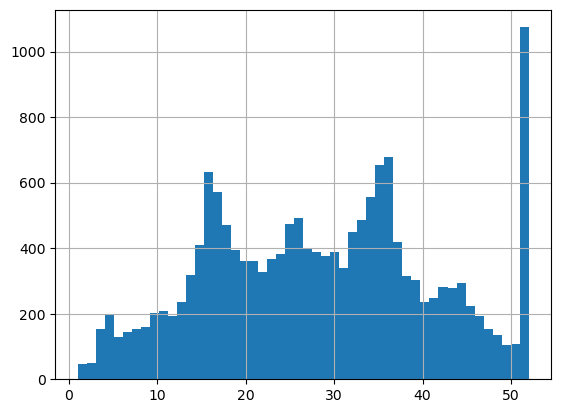

In [76]:
housing['housing_median_age'].hist(bins=50)